In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
# import japanize_matplotlib
from datetime import datetime

plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.family'] = 'meiryo'

In [2]:
df = pd.read_csv('https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37317 entries, 0 to 37316
Data columns (total 17 columns):
No              37317 non-null int64
全国地方公共団体コード     37317 non-null int64
都道府県名           37317 non-null object
市区町村名           0 non-null float64
公表_年月日          37317 non-null object
発症_年月日          5496 non-null object
確定_年月日          9019 non-null object
患者_居住地          36778 non-null object
患者_年代           37317 non-null object
患者_性別           37317 non-null object
患者_職業           9019 non-null object
患者_状態           0 non-null float64
患者_症状           0 non-null float64
患者_渡航歴の有無フラグ    0 non-null float64
患者_接触歴の有無フラグ    3949 non-null float64
備考              0 non-null float64
退院済フラグ          31947 non-null float64
dtypes: float64(7), int64(2), object(8)
memory usage: 4.8+ MB


In [4]:
df['公表_年月日'] = pd.to_datetime(df['公表_年月日'], format='%Y-%m-%d')
df['退院済フラグ'] = np.where(df['退院済フラグ'].isnull(), 0, 1)
# df = df[["No", "全国地方公共団体コード", "都道府県名", "公表_年月日", "曜日", "患者_居住地", "患者_年代", "患者_性別", "退院済フラグ"]]
df = df[["No", "全国地方公共団体コード", "都道府県名", "公表_年月日", "確定_年月日", "患者_居住地", "患者_年代", "患者_性別", "退院済フラグ"]]
df.rename(columns={'公表_年月日': '公表年月日', '患者_居住地': '患者居住地', '患者_年代': '患者年代', '患者_性別': '患者性別'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37317 entries, 0 to 37316
Data columns (total 9 columns):
No             37317 non-null int64
全国地方公共団体コード    37317 non-null int64
都道府県名          37317 non-null object
公表年月日          37317 non-null datetime64[ns]
確定_年月日         9019 non-null object
患者居住地          36778 non-null object
患者年代           37317 non-null object
患者性別           37317 non-null object
退院済フラグ         37317 non-null int32
dtypes: datetime64[ns](1), int32(1), int64(2), object(5)
memory usage: 2.4+ MB


C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [5]:
df.head()

,No,全国地方公共団体コード,都道府県名,公表年月日,確定_年月日,患者居住地,患者年代,患者性別,退院済フラグ
0,1,130001,東京都,2020-01-24,NaN,湖北省武漢市,40代,男性,1
1,2,130001,東京都,2020-01-25,NaN,湖北省武漢市,30代,女性,1
2,3,130001,東京都,2020-01-30,NaN,湖南省長沙市,30代,女性,1
3,4,130001,東京都,2020-02-13,NaN,都内,70代,男性,1
4,5,130001,東京都,2020-02-14,NaN,都内,50代,女性,1


In [6]:
summary = '患者数累計：{0:,}人({1:%m-%d}時点)'.format(len(df), df['公表年月日'].max())

In [7]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

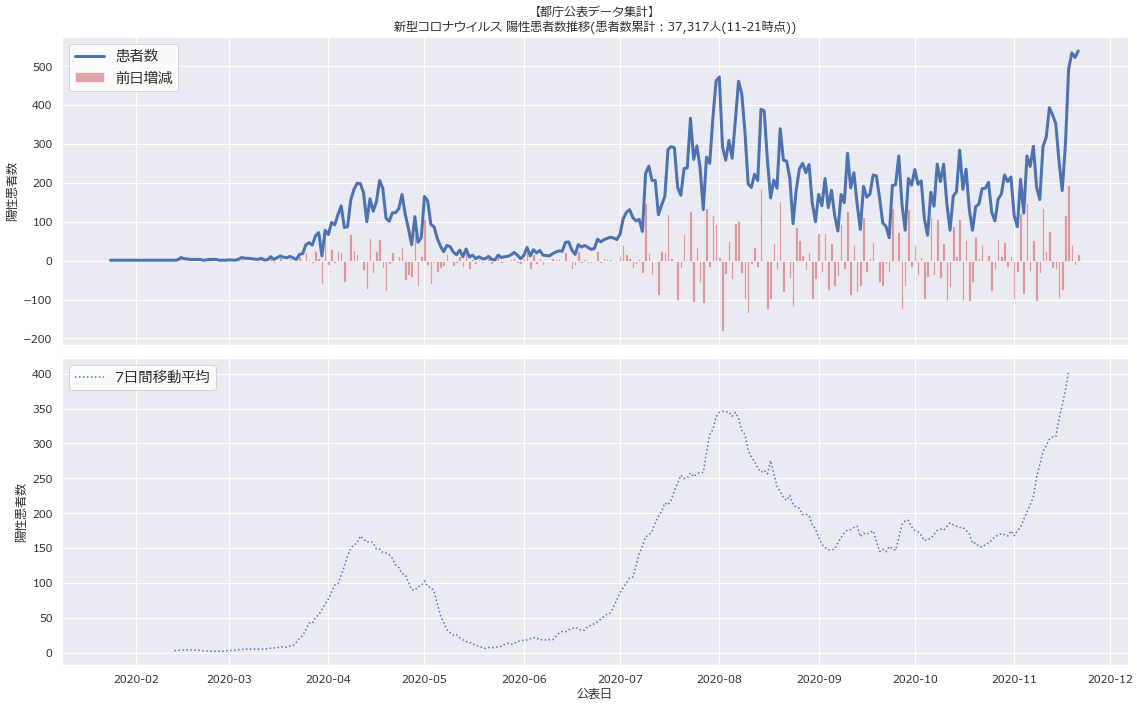

In [10]:
# 日別感染者数
data = df.groupby('公表年月日').size()

# 前日との差分
diff_onedayago = np.diff(data)
diff_data = pd.Series(data=diff_onedayago, index=data.index[1:])
data = pd.DataFrame(pd.concat([data, diff_data], axis=1))

data.rename(columns={0: '患者数', 1: '前日増減'}, inplace=True)

# グラフ：患者数と前日増減
fig, ax = plt.subplots(2, figsize=(16, 10), sharex=True)

ax[0].plot(data.index, data['患者数'], lw=3)
ax[0].set_title('【都庁公表データ集計】\n新型コロナウイルス 陽性患者数推移({})'.format(summary))
ax[0].set_ylabel('陽性患者数')

ax[0].bar(data.index, data['前日増減'], color='r', alpha=0.5)
ax[0].legend(data, loc='upper left', fontsize='large', facecolor="w")

# グラフ：7日間移動平均
rolling = pd.DataFrame(data['患者数'].rolling(7, center=True).mean())
rolling.rename(columns={'患者数': '7日間移動平均'}, inplace=True)
ax[1].plot(rolling.index, rolling['7日間移動平均'], linestyle=':')
ax[1].legend(rolling, loc='upper left', fontsize='large', facecolor="w")
ax[1].set_ylabel('陽性患者数')
ax[1].set_xlabel('公表日');

# 注釈を付加
# annotate_data = [
#     (datetime(2020, 4, 16), '全国へ緊急事態宣言')
# ]

In [ ]:
data[::-1]

In [ ]:
# # https://qiita.com/maskot1977/items/e4f5f71200180865986e
# from scipy.optimize import curve_fit

# def func(X, *params):
#     Y = np.zeros_like(X)
#     for i, param in enumerate(params):
#         Y = Y + np.array(param * X ** i)
#     return Y

# rolling.fillna(0, inplace=True)
# popt, pcov = curve_fit(func, rolling.reset_index().index, rolling['7日間移動平均'].values, p0=[1, 1, 1, 1, 1]) 
# popt

In [ ]:
pd.merge()